<a href="https://colab.research.google.com/github/matiasivan808/ProyectoParteIIIGaspar/blob/main/ProyectoParteIII_Gaspar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Abstract

Situación de análisis
En el contexto actual de transición tecnológica, los gobiernos y actores del sector automotriz enfrentan el reto de diseñar estrategias basadas en información precisa orientada a la adopción de tecnologías limpias.


Objetivo del estudio:
Este estudio tiene como próposito desarrollar un modelo predictivo basado en aprendizaje supervisado para clasificar los tipos de vehículos eléctricos registrados en una base de datos pública. La clasificación se enfoca en distinguir entre vehículos eléctricos de batería (BEV) y vehículos eléctricos híbridos enchufables (PHEV). La motivación surge de la necesidad de comprender la distribución, caracteristicas y crecimiento de distintas tecnologías de electromovilidad, con el fin de contribuir a la toma de decisiones en materia de infraestructura, incentivos gubernamentales o proyecciones de adopción tecnológica.

Descripción de los campos de dataset:
*   Marca: Fabricante del vehículo.
*   Modelo: Nombre Comercial del modelo del vehículo.
*   Año del modelo: Año de fabricación.
*   Ciudad: Ubicación geográfica.
*   Tipo de Vehículo Eléctrico (target): Variable Objetivo binaria que clasifica los registros como BEV o PHEV.
*   VIN(1-10): Número de identificación del vehículo.
*   Elegibilidad para Vehículo de Combustible Alternativo Limpio (CAFV): Indica si el vehículo cumple con los requisitos del programa de vehículos de combustible alternativo limpio del Estado.
*   Autonomía Eléctrica: Distancia estimada (millas) que el vehículo puede recorrer utilizando únicamente energía eléctrica.
*   Precio de Venta Sugerido Base (MSRP): Precio base de venta sugerido por fabricante (Manufacturer's Suggested Retail Price).
*   Distrito Legislativo: Código que representa el distrito legislativo donde está registrado el vehículo.
*   ID del Vehículo del Departamento de Trabajo (DOL): Identificador único asignado por Departamento de Licencias.
*   Ubicación del Vehículo: Información de localización precisa de vehículo.
*   Servicio Eléctrico: Nombre del proveedor de electricidad del área donde se encuentra registrado el vehículo.
*   Área Censal 2020: Identificador geográfico según la división censal oficial de Estados Unidos.

Source:

https://www.kaggle.com/datasets/dhamur/cars-data?select=Electric+Vehicle+Population+Data.csv

```
Hipotesis planteada:

Las características técnicas y geográficas de los vehículos registrados (como marca, modelo, año del modelo, autonomía eléctrica y ubicación) influyen significativamente en la probabilidad de que un vehículo eléctrico sea clasificado como BEV (Battery Electric Vehicle) o PHEV (Plug-in Hybrid Electric Vehicle).

*  ¿Existen diferencias significativas en las variables técnicas (por ejemplo, autonomía eléctrica, año del modelo o precio sugerido) entre los vehículos clasificados como BEV y PHEV?

*  ¿El cambio de paradigma ambiental en los ultimos años puede influir en la elección del tipo de vehículo?

*  ¿Es posible predecir con un nivel aceptable de precisión el tipo de vehículo eléctrico utilizando técnicas de clasificación supervisada basadas en los atributos disponibles del dataset?

1. Carga de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Datos de población de vehículos eléctricos.csv",delimiter=',', encoding='latin-1')

In [3]:
df.head()

,VIN (1-10),Condado,Ciudad,Estado,Código Postal,Año del Modelo,Marca,Modelo,Tipo de Vehículo Eléctrico,Elegibilidad para Vehículo de Combustible Alternativo Limpio (CAFV),Autonomía Eléctrica,Precio de Venta Sugerido Base (MSRP),Distrito Legislativo,ID del Vehículo del Departamento de Trabajo (DOL),Ubicación del Vehículo,Servicio Eléctrico,Área Censal 2020
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020.0,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258.0,0.0,43.0,249675142.0,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022.0,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,1.0,233928502.0,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023.0,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,14.0,229675939.0,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,45.0,104714466.0,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018.0,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97.0,0.0,22.0,185498386.0,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                                                Non-Null Count   Dtype  
---  ------                                                                --------------   -----  
 0   VIN (1-10)                                                            150482 non-null  object 
 1    Condado                                                              150163 non-null  object 
 2    Ciudad                                                               150163 non-null  object 
 3    Estado                                                               150166 non-null  object 
 4    Código Postal                                                        150163 non-null  float64
 5    Año del Modelo                                                       150166 non-null  float64
 6    Marca                                                                150166 non-nul

In [5]:
df_copia = df.copy()

In [6]:
df_copia.describe()

,Código Postal,Año del Modelo,Autonomía Eléctrica,Precio de Venta Sugerido Base (MSRP),Distrito Legislativo,ID del Vehículo del Departamento de Trabajo (DOL),Área Censal 2020
count,150163.000000,150166.000000,150166.000000,150166.000000,149825.000000,1.501660e+05,1.501630e+05
mean,98166.969693,2020.006060,67.880339,1313.018992,29.387893,2.111278e+08,5.297181e+10
std,2475.969246,3.015226,96.227251,9232.862871,14.807870,8.195628e+07,1.640561e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.693835e+08,5.303301e+10
50%,98121.000000,2021.000000,18.000000,0.000000,33.000000,2.150421e+08,5.303303e+10
75%,98368.000000,2023.000000,97.000000,0.000000,43.000000,2.399211e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


2. Preparación de Dataset

In [7]:
df_copia.isnull().sum()

,0
VIN (1-10),0
Condado,319
Ciudad,319
Estado,316
Código Postal,319
Año del Modelo,316
Marca,316
Modelo,316
Tipo de Vehículo Eléctrico,316
Elegibilidad para Vehículo de Combustible Alternativo Limpio (CAFV),316


In [8]:
print(df.isnull().sum())

VIN (1-10)                                                                0
 Condado                                                                319
 Ciudad                                                                 319
 Estado                                                                 316
 Código Postal                                                          319
 Año del Modelo                                                         316
 Marca                                                                  316
 Modelo                                                                 316
 Tipo de Vehículo Eléctrico                                             316
 Elegibilidad para Vehículo de Combustible Alternativo Limpio (CAFV)    316
 Autonomía Eléctrica                                                    316
 Precio de Venta Sugerido Base (MSRP)                                   316
 Distrito Legislativo                                                   657
 ID del Vehí

In [9]:
df_copia = df.dropna()

In [10]:
print(df_copia.isnull().sum())

VIN (1-10)                                                              0
 Condado                                                                0
 Ciudad                                                                 0
 Estado                                                                 0
 Código Postal                                                          0
 Año del Modelo                                                         0
 Marca                                                                  0
 Modelo                                                                 0
 Tipo de Vehículo Eléctrico                                             0
 Elegibilidad para Vehículo de Combustible Alternativo Limpio (CAFV)    0
 Autonomía Eléctrica                                                    0
 Precio de Venta Sugerido Base (MSRP)                                   0
 Distrito Legislativo                                                   0
 ID del Vehículo del Departamento de T

In [11]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149821 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                                                Non-Null Count   Dtype  
---  ------                                                                --------------   -----  
 0   VIN (1-10)                                                            149821 non-null  object 
 1    Condado                                                              149821 non-null  object 
 2    Ciudad                                                               149821 non-null  object 
 3    Estado                                                               149821 non-null  object 
 4    Código Postal                                                        149821 non-null  float64
 5    Año del Modelo                                                       149821 non-null  float64
 6    Marca                                                                149821 non-null  ob

3. Analisis explotario da datos (EDA)

In [12]:
top_marca = df_copia[' Marca'].value_counts().nlargest(15)


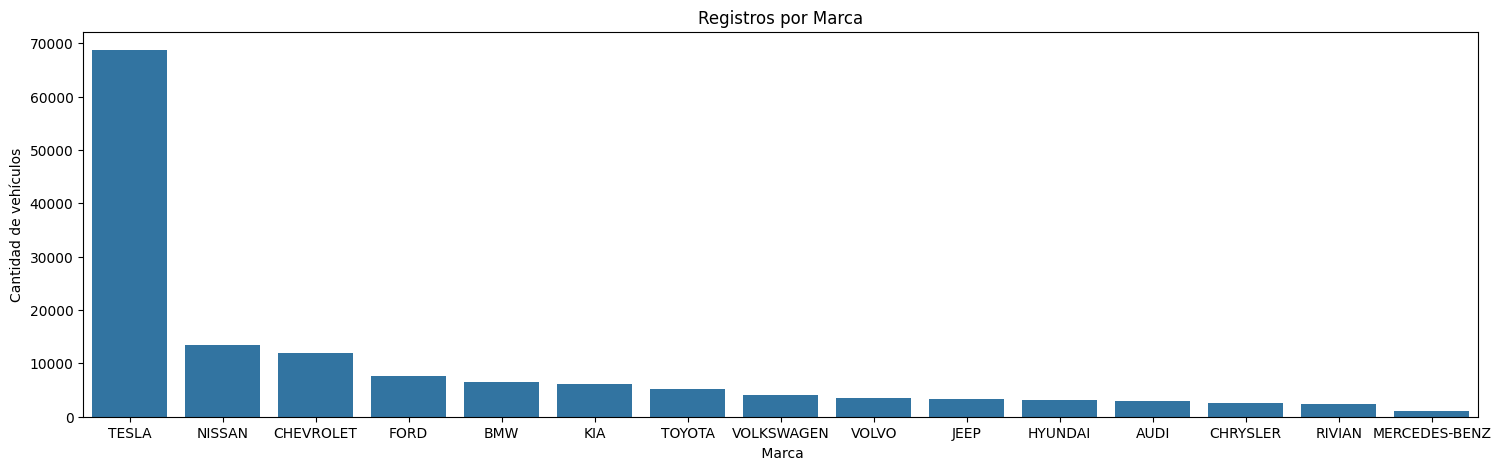

In [13]:
import seaborn as sns

plt.figure(figsize=(18,5))
sns.barplot(x=top_marca.index,y=top_marca,order=top_marca.index)
plt.title("Registros por Marca")
plt.ylabel("Cantidad de vehículos")
plt.show()

In [14]:
top_model = df_copia[" Modelo"].value_counts().nlargest(15)

<ipython-input-15-25a188a12c7f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_model.index,y=top_model,order=top_model.index,palette="magma")


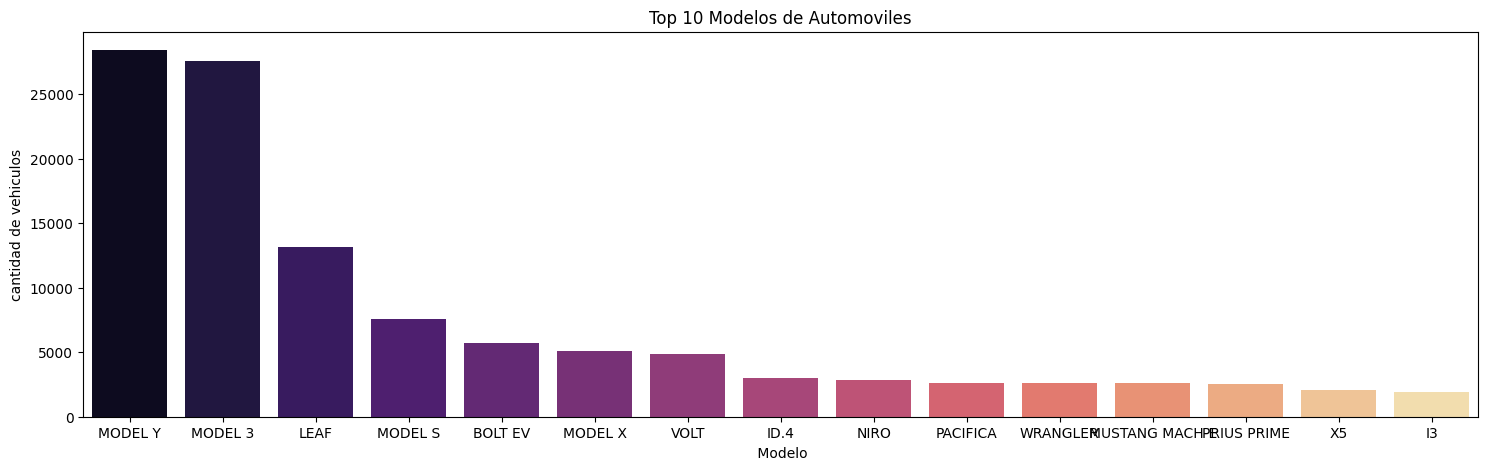

In [15]:
plt.figure(figsize=(18,5))
sns.barplot(x=top_model.index,y=top_model,order=top_model.index,palette="magma")
plt.title("Top 10 Modelos de Automoviles")
plt.ylabel("cantidad de vehiculos")
plt.show()

In [16]:
vehic_electr_anio = df_copia[" Año del Modelo"].value_counts().sort_index()

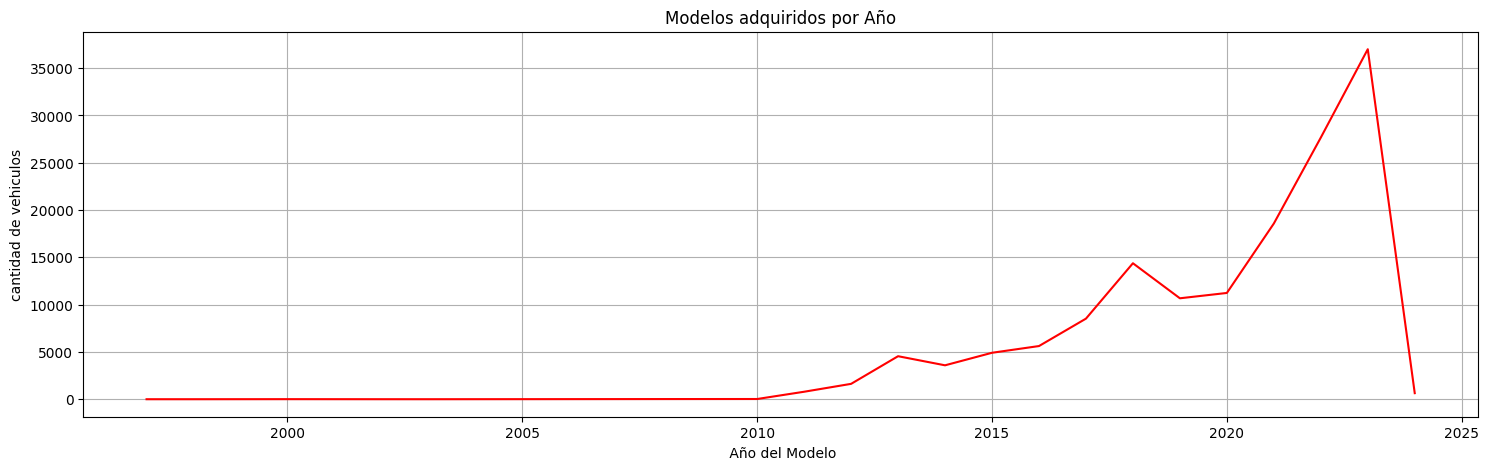

In [17]:
plt.figure(figsize=(18,5))
sns.lineplot(x=vehic_electr_anio.index,y=vehic_electr_anio,markers='o',color='r')
plt.title("Modelos adquiridos por Año")
plt.ylabel("cantidad de vehiculos")
plt.grid(True)
plt.show()

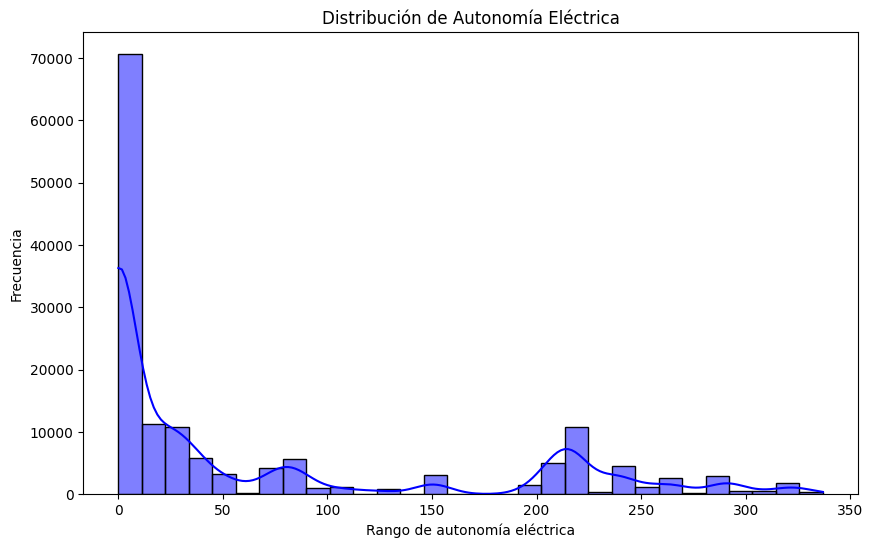

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df_copia[" Autonomía Eléctrica"], bins=30, kde=True, color='blue')
plt.title('Distribución de Autonomía Eléctrica')
plt.xlabel('Rango de autonomía eléctrica')
plt.ylabel('Frecuencia')
plt.show()

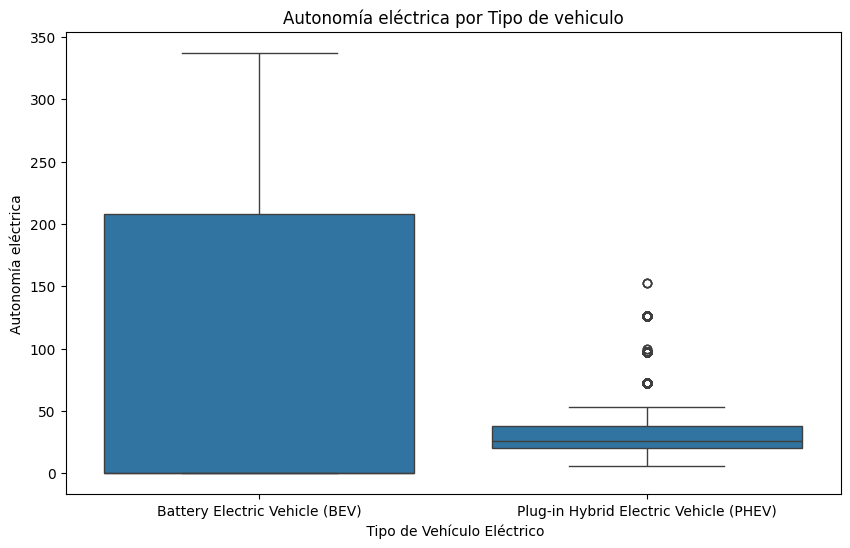

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_copia[" Tipo de Vehículo Eléctrico"],y=df_copia[" Autonomía Eléctrica"])
plt.title('Autonomía eléctrica por Tipo de vehiculo')
plt.ylabel('Autonomía eléctrica')
plt.show()

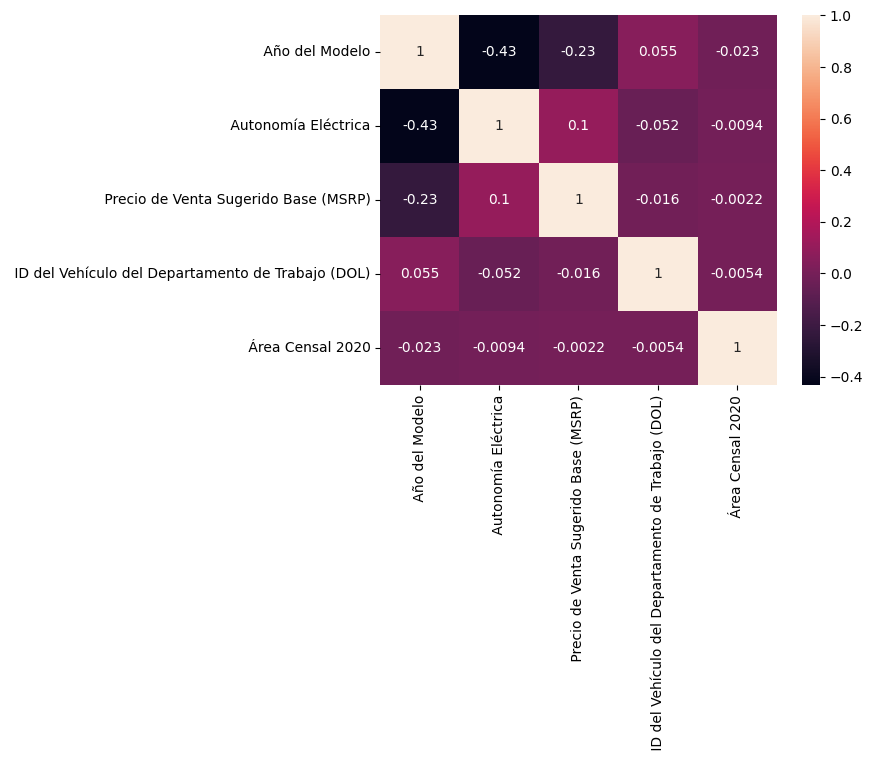

In [20]:
var_continuas = [' Año del Modelo',' Autonomía Eléctrica', ' Precio de Venta Sugerido Base (MSRP)', ' ID del Vehículo del Departamento de Trabajo (DOL)',' Área Censal 2020']

import seaborn as sns
matriz_correlacion=df_copia[var_continuas].corr()
sns.heatmap(matriz_correlacion, annot=True)
plt.show()

Resultados de analisis:
* Relaciones muy debiles entre variables númericas.
* Distribución marcada sobre la autonomía eléctrica de los vehiculos en función al tipo de vehículo y en crecimiento en los últimos años.
* Diferencia significativa entre la variable de autonomía eléctrica respecto al tipo de vehículo.

In [21]:
valores_unicos = df_copia[' Tipo de Vehículo Eléctrico'].unique()

# Revisa el numero de valores unicos en columna Tipo de Vehículo Eléctrico.
if len(valores_unicos) > 2:
  # Si hay mas de 2 valores unicos, entonces
  print(f"La columna `Tipo de vehículo eléctrico` tiene más de 2 valores unicos: {valores_unicos}.La regresión logística es adecuada para problemas de clasificación binaria (2 clases).")
else:
  # En caso contrario, proceder con regresión logística
  print("La columna `Tipo de vehículo eléctrico` tiene 2 o menos valores únicos, Por lo tanto, la regresión logística es adecuada.")

La columna `Tipo de vehículo eléctrico` tiene 2 o menos valores únicos, Por lo tanto, la regresión logística es adecuada.


In [22]:
df_copia = df_copia.drop(columns=['VIN (1-10)', ' Ubicación del Vehículo'])

In [23]:
y = df_copia[' Tipo de Vehículo Eléctrico']
X = df_copia.drop(columns=[' Tipo de Vehículo Eléctrico'])

In [24]:
categorical_features = X.select_dtypes(include='object').columns.tolist()

In [25]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149821 entries, 0 to 150481
Data columns (total 15 columns):
 #   Column                                                                Non-Null Count   Dtype  
---  ------                                                                --------------   -----  
 0    Condado                                                              149821 non-null  object 
 1    Ciudad                                                               149821 non-null  object 
 2    Estado                                                               149821 non-null  object 
 3    Código Postal                                                        149821 non-null  float64
 4    Año del Modelo                                                       149821 non-null  float64
 5    Marca                                                                149821 non-null  object 
 6    Modelo                                                               149821 non-null  ob

In [26]:
# Eliminar filas con valores nulos en columnas clave
df_copia = df_copia.dropna(subset=[' Tipo de Vehículo Eléctrico'])

4. Preprocesamiento de datos y Encoder

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # deja las columnas numéricas tal como están
)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

5. Entrenamiento de Modelo

In [29]:
from sklearn.model_selection import train_test_split

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.metrics import classification_report

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                        precision    recall  f1-score   support

        Battery Electric Vehicle (BEV)       0.77      1.00      0.87     23163
Plug-in Hybrid Electric Vehicle (PHEV)       0.00      0.00      0.00      6802

                              accuracy                           0.77     29965
                             macro avg       0.39      0.50      0.44     29965
                          weighted avg       0.60      0.77      0.67     29965



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


6. Evaluar resultado: Detección de Desbalanceo

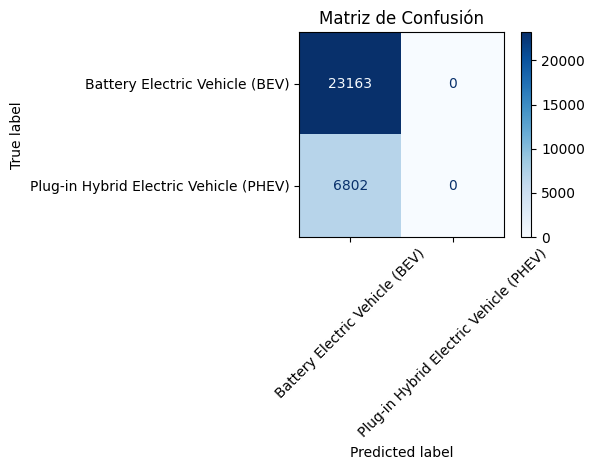

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generar Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)

# Mostrar visualmente
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Matriz de Confusión")
plt.tight_layout()
plt.show()

** Empleo de RandomOverSampler: Consiste en el sobremuestreo, el cual implica aumentar la cantidad de muestras de la clase o clases minoritarias, de modo que el modelo no se vea sesgado hacia la clase mayoritaria. Esto se hace replicando aleatoriamente ejemplos existentes de la clase minoritaria.

Ventaja: Sencillo y efectivo para mejorar el rendimiento en datos desbalanceados.
Desventaja: Puede provocar overfitting, ya que los ejemplos añadidos son copias exactas de otros.

                                        precision    recall  f1-score   support

        Battery Electric Vehicle (BEV)       0.78      0.53      0.63     23163
Plug-in Hybrid Electric Vehicle (PHEV)       0.24      0.50      0.32      6802

                              accuracy                           0.52     29965
                             macro avg       0.51      0.52      0.48     29965
                          weighted avg       0.66      0.52      0.56     29965



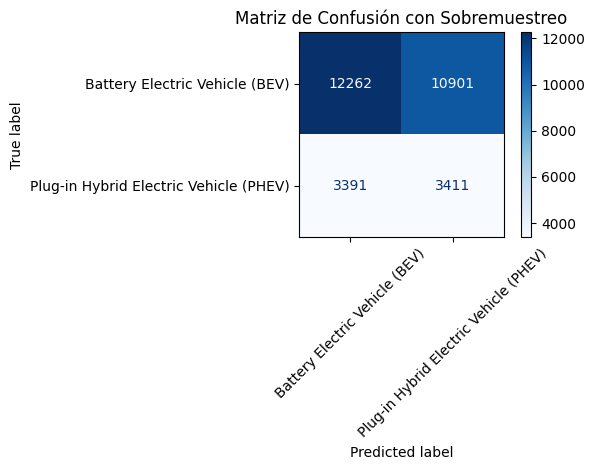

In [32]:
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Pipeline final
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])
pipeline.fit(X_train_resampled, y_train_resampled)

# Evaluación
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Matriz de Confusión con Sobremuestreo")
plt.tight_layout()
plt.show()

Conclusión:
El modelo desarrollado permite inferir el tipo de vehículo eléctrico a partir de atributos disponibles, lo que puede resultar valioso para entidades regulatorias, fabricantes o investigadores en electromovilidad.

Estudio de resultado:
Si bien los resultados son mejorables, la consideración de técnicas de balanceo mejora sustancialmente la utilidad del modelo al evitar sesgos sin omitir la influencia sobre el impacto en la exactitud.